# LAB 1 : Realisation of Logic Gates and Linear Regression Equation

Name : Vaishnavi Patil

Roll Number : 180020039

Referrence Material : Page no. 26-29, Artificial Neural Network by B. Yegnanarayana




#**Problem 1** : Demonstrate the realization of NAND gate, NOR gate, and XOR gate using McCulloch Pitts (MP) and Rosenblatt’s Perceptron model.

  1. Write down the truth table of the logic gates.
  2. For MP model: compute the appropriate weight, such that the neuron provide logic
  gate output.
  3. For Perceptron: use truth table values as input and output to learn the weights
  through weight update equation.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



## Objective:

To observe and understand the working of MP model and Rosenblatt's Perceptron model by demonstrating different booolean logic gates.


## Hypothesis:

The MP model should provide the desired logic gate output given the appropiate weights and threshold. The perceptron should be able to learn the appropiate weights through the perceptron learning law, to get the desired output.

## Experimental Description: 


STeps for MP Model:

 Step 1: generate a vector of inputs and a vector of weights.

 Step 2: compute the dot product between the matrix of inputs and weights (sum of product of input and weights)

 Step 3: Define the threshold activation function. The neuron will fire if above product is >= Th.

 Step 4: Compute the output based on the threshold value.



Steps for Perceptron Learning:

1 : Initialise random weights and biases, choose a learning rate.

2: Run this perceptron loop for learning weights: 

    1) Compute the new i/p : sum(wi,xi) + bias
    2) Pass the above input to activation function : 1 (yin>0) else 0
    3) Update the weights : wnew = wold + lr*err*xi

Run this loop for all the inputs for a fixed no of epochs.

## Programming : 
  Please write a program to demonstrate the same

In [ ]:
## Part A : MP model

import numpy as np
import matplotlib.pyplot as plt


def mp_model(x,gate):
 
  ## Write the activation function and define weights and bias for all three gates
  def linear_threshold_gate(activation, Threshold) -> int:
    '''Returns the binary threshold output'''
    if activation >= Threshold:
        return 1
    else:
        return 0

  if gate == "NAND":

    ## Write your code here
    weights = [-1,-1]
    # dot product matrix of inputs and weights
    dot_product = x[0]*weights[0] + x[1]*weights[1]
    #Threshold
    T = -1
    out = linear_threshold_gate(dot_product, T)
    return out



  if gate == "NOR":

    ## Write your code here
    weights = np.array([-1,-1])
    # dot product matrix of inputs and weights
    dot_product = x[0]*weights[0] + x[1]*weights[1]
    #Threshold
    T = 0
    out = linear_threshold_gate(dot_product, T)
    return out    

  
  if gate == "XOR":

    ## Write your code here
    #xor = not(x1).x2 + x1.not(x2)

    #for xor1
    weights = np.array([-1,1])
    dot_product = x[0]*weights[0] + x[1]*weights[1]
    T = 1
    xor1 = linear_threshold_gate(dot_product, T)

    #for xor2
    weights = np.array([1,-1])
    dot_product = x[0]*weights[0] + x[1]*weights[1]
    T = 1
    xor2 = linear_threshold_gate(dot_product, T)

    #xor1 OR xor2
    weights = np.array([1,1])
    dot_product = xor1*weights[0] + xor2*weights[1]
    T = 1
    out = linear_threshold_gate(dot_product, T)

    return out

  

inp_list = [[0,0],  [0,1], [1,0], [1,1]] ## Create a list consisting of inputs to logic gates (Binary, i.e (0,0),(0,1),(1,0),(1,1))
req_gates = ['NAND','NOR','XOR'] ## Create a list of all gates (NAND,NOR,XOR)

for gate in req_gates:
  print('Results for ' + gate + ' gate : ')
  for inp in inp_list:
    print("Input is : " + str(inp))
    out = mp_model(inp,gate)
    print("Logic Gate output is : ",out)
  
  print('=====================================')

Results for NAND gate : 
Input is : [0, 0]
Logic Gate output is :  1
Input is : [0, 1]
Logic Gate output is :  1
Input is : [1, 0]
Logic Gate output is :  1
Input is : [1, 1]
Logic Gate output is :  0
Results for NOR gate : 
Input is : [0, 0]
Logic Gate output is :  1
Input is : [0, 1]
Logic Gate output is :  0
Input is : [1, 0]
Logic Gate output is :  0
Input is : [1, 1]
Logic Gate output is :  0
Results for XOR gate : 
Input is : [0, 0]
Logic Gate output is :  0
Input is : [0, 1]
Logic Gate output is :  1
Input is : [1, 0]
Logic Gate output is :  1
Input is : [1, 1]
Logic Gate output is :  0


Weights for NAND : 
[1.0, -1.0, -0.5]


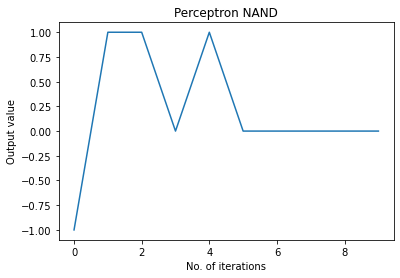

Weights for NOR : 
[0.0, -0.5, -0.5]


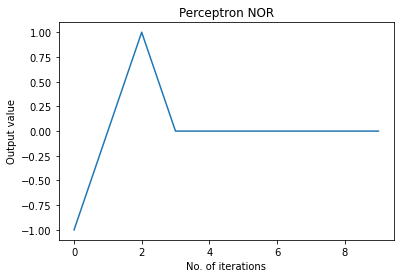

Weights for XOR : 
[0.0, -0.5, 0.0]


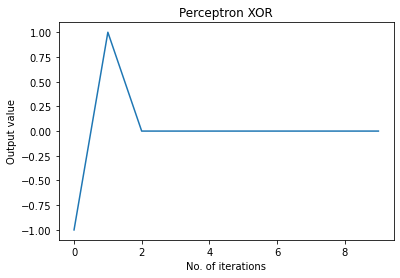

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make a prediction with weights
def predict(row, weights):
	activation = weights[0]
	for i in range(0,len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def rosenblatt_perceptron(inp_list,output, l_rate, w_initial, n_epoch, gate):
  inp_list = [[0,0],  [0,1], [1,0], [1,1]]
  for i in range(0,len(inp_list)):
    inp_list[i].append(output[i])  #print(inp_list)
  train = inp_list
 # print(train)
  weights = [0.0 for i in range(0, len(train[0]))]
  #print(train[0], weights)
  #weights = [0,0,0]
  err = []
  for epoch in range(n_epoch):
    sum_error = 0.0
    for row in train:
      prediction = predict(row, weights)
      error = row[-1] - prediction
      sum_error += error
      weights[0] = weights[0] + l_rate * error
      for i in range(0, len(row)-1):
        weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
    #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    err.append(sum_error)
  return weights, err

inp_list = [[0,0],  [0,1], [1,0], [1,1]] ## Create a list consisting of inputs to logic gates (Binary, i.e (0,0),(0,1),(1,0),(1,1))
nand_output = [1,1,1,0] ## Define NAND gate target output
nor_output = [1, 0 ,0,0]## Define NOR gate target output
xor_output = [0,1,1,0] ## Define XOR gate target output

learning_rate = 0.5 ## Define a learning rate
w_initial = [0,0,0] ## Initialise weights
num_epochs = 10## Set number of epochs

## For NAND gate

w_new,error = rosenblatt_perceptron(inp_list,nand_output,learning_rate,w_initial,num_epochs,"NAND")
print("Weights for NAND : ")
print(w_new)
#fig, axs = plt.subplots(3)
plt.plot(list(range(num_epochs)), error)
plt.title("Perceptron NAND")
plt.xlabel("No. of iterations")
plt.ylabel("Output value")
plt.show()


## For NOR gate

w_new,error = rosenblatt_perceptron(inp_list,nor_output,learning_rate,w_initial,num_epochs,"NOR")
print("Weights for NOR : ")
print(w_new)
plt.plot(list(range(num_epochs)), error)
plt.title("Perceptron NOR")
plt.xlabel("No. of iterations")
plt.ylabel("Output value")
plt.show()



## For XOR gate
w_new,error = rosenblatt_perceptron(inp_list,xor_output,learning_rate,w_initial,num_epochs,"XOR")
print("Weights for XOR : ")
print(w_new)
plt.plot(list(range(num_epochs)), error)
plt.title("Perceptron XOR")
plt.xlabel("No. of iterations")
plt.ylabel("Output value")
plt.show()


## Inferences and Conclusion : State all the key observations and conclusion

## MP Model:

1. No learning is possible: We have to figure it out the solution to your problem beforehand. In this sense, the model has no autonomy whatsoever, restricting the problems that can be solved to the ones that you know how to solve already.

2. Manual adjustment of the weights and threshold: connected to the lack of a learning procedure, once you figure out the solution, you will have to adjust all the parameters by hand.

3. A single perceptron can only be used to implement linearly separable functions. XOR function requires Multi-layer Perceptron or MLP.



## Perceptron : 

1. Perceptron has a learning algorithm and thus no manual adjustment of weights and threshold was required.

2. The error vs iterations plot have shown that the appropiate weights are learnt.

# **Problem 2** : Demonstrate the realization of y = 1 + 2x1 + 2x2 using Widrow’s Adaline model.

  1. Generate some N no. of data points using equation y = 1 + 2x1 + 2x2.
  2. Use the input and output data to train the Adaline model, after training the Adaline
  model should provide appropriate y as output value for any arbitrary input.

## Write down the Objectives, Hypothesis and Experimental description for the above problem

## Objective:

To observe and understand the working of Widrow's Adaline Model.


## Hypothesis:

The Widrow's Adaline model should train and learn the appropiate weights using its learning algorithm.


## Experimental Description: 

Steps for Widrow's Adaline Learning:

1 : Initialise random weights and biases, choose a learning rate.

2: Run this perceptron loop for learning weights: 

    1) Compute the new i/p : sum(wi,xi) + bias
    2) Update the weights : wnew = wold + lr*err*xi : where error is taken directly as i/p - new i/p, using linear activation function.

Run this loop for all the inputs for a fixed no of epochs.

## Programming : 
  Please write a program to demonstrate the same

Data Creation

In [2]:
from numpy import random

x1=random.rand(100)
x2 = random.rand(100)
y = 1 + 2*x1 + 2*x2
inp = []
for i in range(len(y)):
  inp.append([x1[i],x2[i],y[i]])



Training algorithm

In [5]:

def predict_linear_activation(row, weights):
	activation = weights[0]
	for i in range(0,len(row)-1):
		activation += weights[i + 1] * row[i]
	return activation

def widrow_adaline(inp,learning_rate,w_initial,num_epochs):

  weights = [1 for i in range(0, len(inp[0]))]
  err = []
  for epoch in range(num_epochs):
    sum_error = 0.0
    for row in inp:
      prediction = predict_linear_activation(row, weights)
      error = row[-1] - prediction
      sum_error += error
      weights[0] = weights[0] + learning_rate * error
      for i in range(0, len(row)-1):
        weights[i + 1] = weights[i + 1] + learning_rate * error * row[i]
    #print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, learning_rate, sum_error))
    err.append(abs(sum_error))
  return weights, err

[1.0102753839840315, 1.9882225734601688, 1.9919991081629789]


Text(0, 0.5, 'Error')

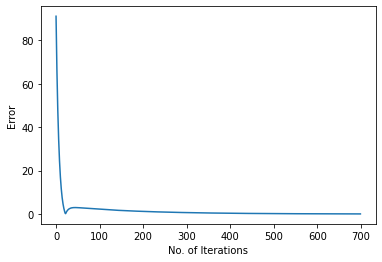

In [7]:
learning_rate = 0.001## Define a learning rate
w_initial = [1,1,1]## Initialise weights
num_epochs = 700 ## Set number of epochs
import matplotlib.pyplot as plt

w_new,error = widrow_adaline(inp,learning_rate,w_initial,num_epochs)
print(w_new)
plt.plot(range(num_epochs),error)
plt.xlabel("No. of Iterations")
plt.ylabel("Error")

## Inferences and Conclusion : State all the key observations and conclusion

1. The Perceptron uses the class labels to learn model coefficients. 
Adaline uses continuous predicted values (from the net input) to learn the model coefficients, which is more “powerful” since it tells us by “how much” we were right or wrong

2.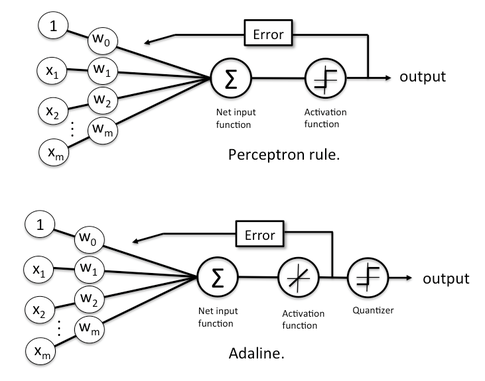
